<img src="./Images/scikit-learn-cover.png" width="500" height="500">

# Scikit-learn

***

## Overview of scikit-learn
Scikit-learn is a free software machine learning library for the Python programming language. It is build upon NumPy, pandas and Matplotlib. It provides many unsupervised and supervised learning algorithms, the library is focused on modeling data.


## Why its used
Scikit-learn is the most useful and indept library for machine learning in Python. It provides a lot of efficient tools for machine learning including classification, regression, clustering, model selection and preprocessing.

### Algorithms
For this module I have been tasked to demonstrate at least three scikit-learn algorithms. The algorithms included in this notebook are:
- [K-means Algorithm](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [Decision Tree Regression](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py)
- [Examples](https://scikit-learn.org/stable/auto_examples/index.html#cluster-examples)


# K-means
***
The KMeans algorithm is an unsupervised clustering machine learning algorithm. A cluster referes to a collection of data points paired together because of certain similarities. This algorithm assumes the number of clusters are pre-defined. The k-means algorithm divides a set of ***N*** samples ***X*** into ***K*** disjoint clusters ***C*** , each described by the mean ***u***  of the samples in the cluster. The means are commonly called the cluster “centroids”; Centroids are initialized by shuffling the dataset and randomly selecting x data points for the centroids. This algorithm calculates and assigns data points to a cluster such that the sum of the squared distance between the data points and centroids are at a minimum.

The algorithm is very popular and is used in a wide variety of applications such as market segmentation, data clustering, image segmentation and compression. It is an easy algorithm to understand and implement especially with help from the [scikit library](https://scikit-learn.org/stable/modules/clustering.html#k-means). 

### How it works
The Kmean algorithm works as follows:

- **1.** Define the number of clusters *K*
- **2.** Initialize centroids by randomly selecting x amount of data points and assigning them to a cluster
- **3.** Compute the sum of the squared distance between the data points and centroids
     - **3.1** Assign each data point to the closest centroid
     - **3.2** Create new centroids by taking the mean value of all the data points assigned to each previous centroid. 
- **4.** Keep iterating **step 3** until there is little to no significant change to the centroids

The K-means algorithm follows the **Expectation-Maximization** approach to solve the problem. An approach where the Expectation step is assigning the data points to the closest cluster and the Maximization step is computing the centroid of each cluster.






## K-Means example: Color Quantization
Below I will demonstrate an example of implementing the K-means algorithm to perform a pixel-wise Vector Quantization of an image of a flower. Reducing the number of colours required to display the image from 133,953 unique colours to 64, while preserving the quality of the image. Every pixel is a 3 dimensional vector with Red, Green and Blue components. The image itself is 735 pixels by 491 pixels, so the total amount of vectors are 360,885. The algorithm is ran on these colour vectors and will specify 64 clusters. The result shows how the image is reduced to only 64 colours, some information is lost but the overall quality of the photo remains true. 

For comparison, a quantized image useing a random selection of colours is shown.



In [1]:
# Import libaries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from skimage import io

In [2]:
# Defined number of clusters
n_colors = 64

In [3]:
# Load the flower photo
flower_img = load_sample_image('flower.jpg')
img=mpimg.imread('./Images/flower.jpg')

In [4]:
flower_img.dtype 

dtype('uint8')

In [5]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
img = np.array(img, dtype=np.float64) / 255

In [6]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))

In [7]:
# Initialize centroids by randomly selecting x amount of data points and assigning them to the image_array_sample
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

Fitting model on a small sub-sample of the data
done in 0.232s.


In [8]:
# Get labels for all points
# Then using the Kmeans predict method, iterates through each data point until there is no change to the clusters
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (k-means)
done in 0.053s.


In [9]:
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (random)
done in 0.411s.


In [10]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

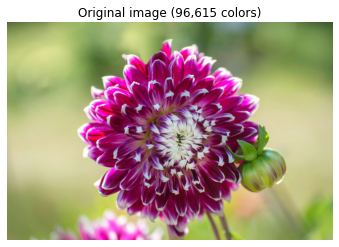

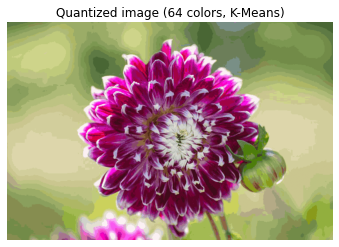

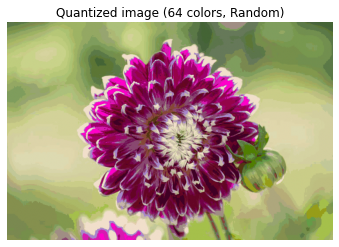

In [11]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(img)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

# Decision Tree Regression
***

The Decision Tree Regression is a non-parametric supervices learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules from the data features. This algorithm was implemented with the help of [scikit library](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html). The advantages to decision trees are its simple to understand and to interpret, requires little data preparation and can handle both numerical and categorical data.

### How it works
Decision tree regressting as in the classification setting, takes in an argument of arrays X and y, the y arrea is expected to have floating point values instead of integer values. Once the arrays are fitted to the tree model, the predicted y value is equal to the predicted tree model of the tested X array.

## Decision Tree Regression example: Predicting the severity of breast cancer
Below I will demonstrate an example of implementing decision tree regression algorithm to perform an accurate prediction on whether breast cancer is malignant or benine based on the data provived from the [Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

In [14]:
# Standard colour scheme.
plt.style.use('seaborn')

In [15]:
# Reading in data
df = pd.read_csv("breast-cancer-wisconsin.csv")

In [16]:
# Displaying data
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


###  Attribute Domain
***
1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Note each real-value has a mean, standard error and worst value

In [17]:
# Checking for Missing Values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [18]:
# Get rid of empty data column with missing values
df = df.dropna(axis=1)

In [19]:
# Count the number of rows and columns in the data set
df.shape

(569, 32)

In [20]:
## Checking the values of data types
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [21]:
# Replace the Diagnosis values with 1 = Malignant and 0 = Benign
df.diagnosis.replace(('M', 'B'),(1,0), inplace=True)

C:\Users\john9\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
# New dataset with diagnosis values replaced and missing values dropped
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data Visualisation
***

C:\Users\john9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

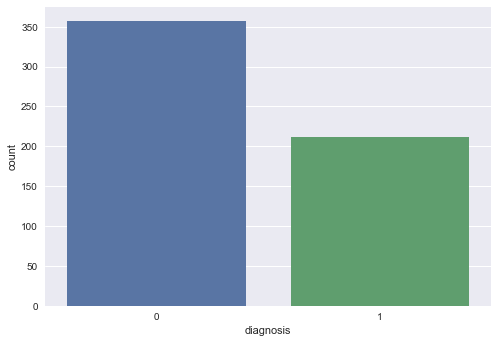

In [24]:
# Distribution of Benign or Malignant breast tumour
sns.countplot(df['diagnosis'], label='Count')

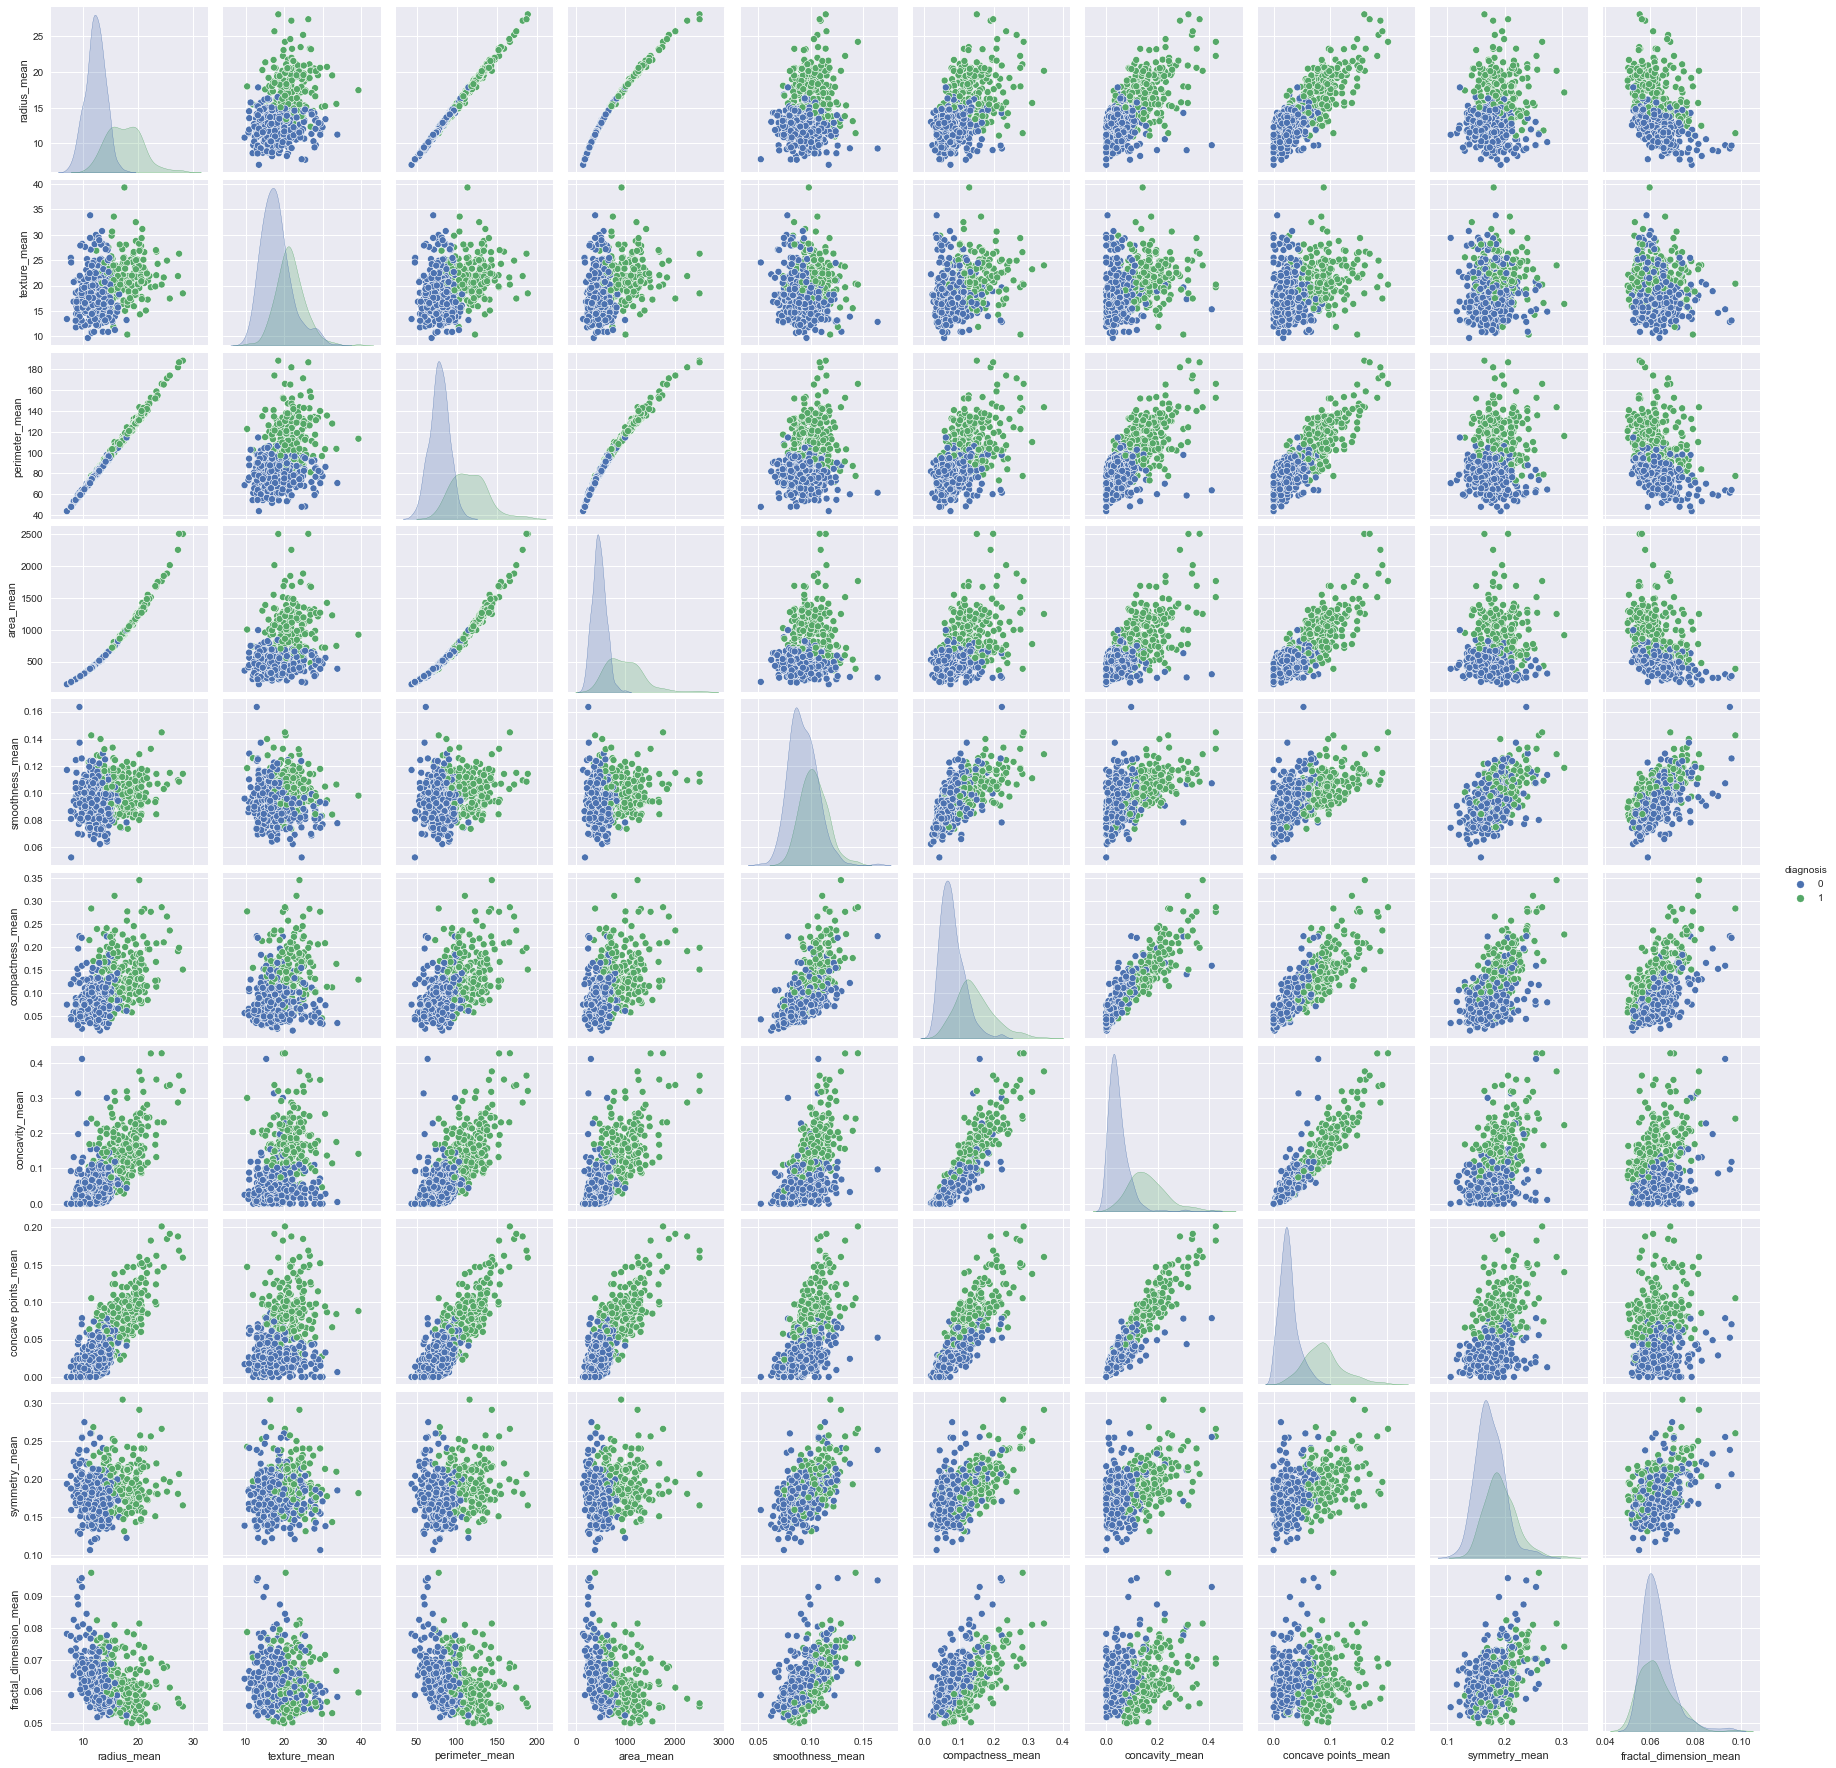

In [25]:
# Visualisation of data in correlation to diagnosis values
sns.pairplot(df.iloc[:,1:12], hue='diagnosis')

<AxesSubplot:>

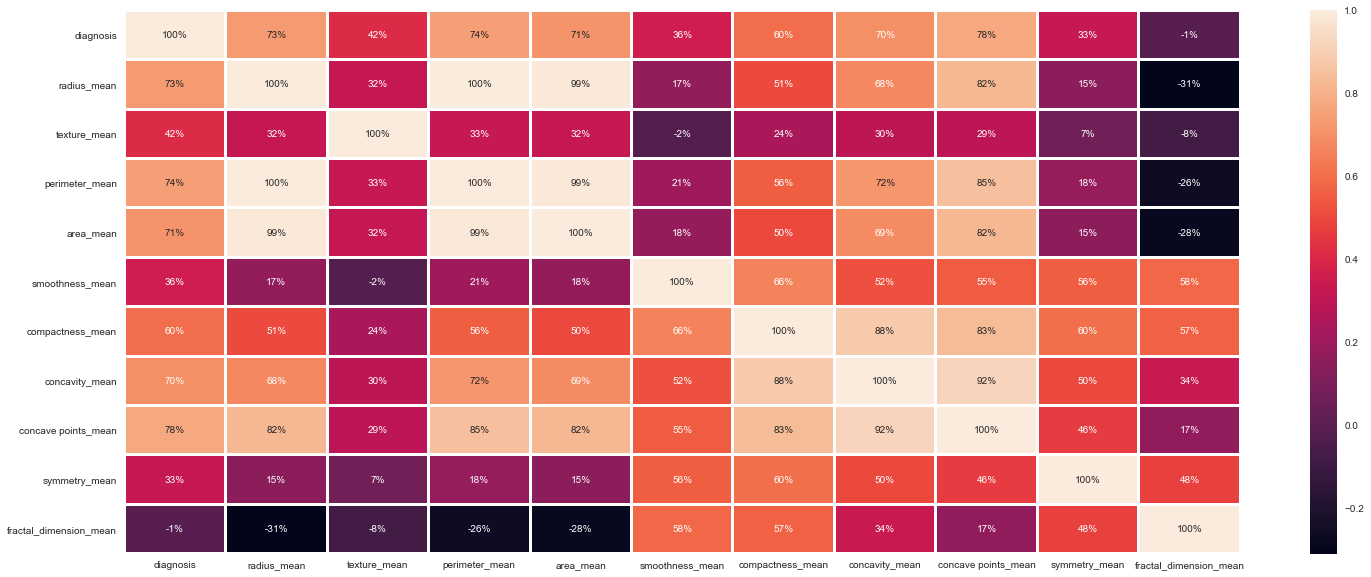

In [26]:
# Using a heatmap to plot all the data effects against each other
f, ax = plt.subplots(figsize = (25, 10))
sns.heatmap(df.iloc[:,1:12].corr(), annot = True, fmt= '.0%', linewidth = 2)

## Train-Test Split
***

In [27]:
# Splitting the data
# X being all the relevant features that determines if the patient has malignant or benign cancer
X = df.iloc[:,2:31].values
# y has the diagnosis whether the patient has malginant or benign cancer
y = df.iloc[:,1].values

In [28]:
# Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size =0.2, random_state = 0)

##  Decision Tree Regression

In [29]:
# Importing our model
from sklearn.tree import DecisionTreeRegressor
# Testing regression with different depths
regr_1 = DecisionTreeRegressor(random_state = 0, max_depth = 1)
regr_2 = DecisionTreeRegressor(random_state = 0, max_depth = 2)
regr_3 = DecisionTreeRegressor(random_state = 0, max_depth = 5)

In [30]:
# Fit regression model to the data
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [31]:
# Prediction data 
pred_1 = regr_1.predict(X_test)
pred_2 = regr_2.predict(X_test)
pred_3 = regr_3.predict(X_test)

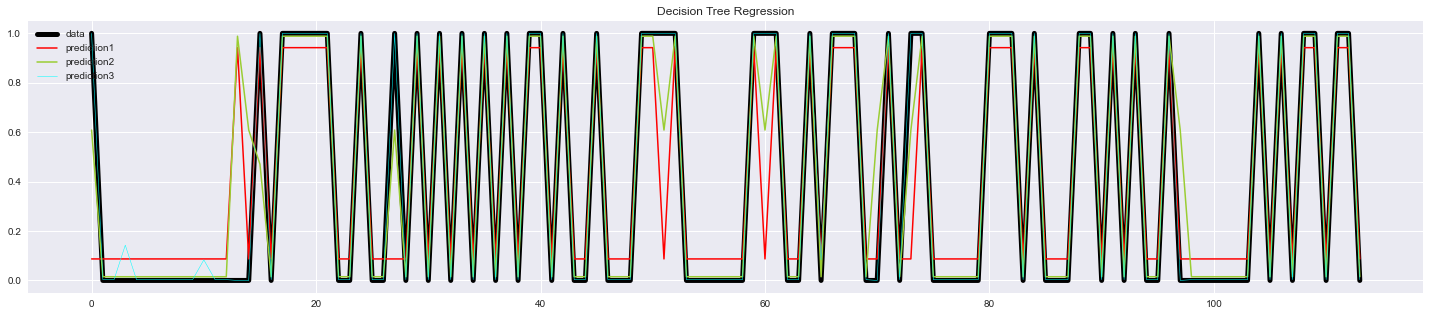

In [32]:
# Plotting prediction and original data
plt.subplots(figsize = (25, 5))

plt.plot(Y_test, label = 'data', linewidth = 5, color = 'black')
plt.plot(pred_1, label = 'prediction1', linewidth = 1.5, color = 'red')
plt.plot(pred_2, label = 'prediction2', linewidth = 1.5, color = 'yellowgreen')
plt.plot(pred_3, label = 'prediction3', linewidth = .5, color = 'cyan')
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [33]:
# Showing the accurary of each prediction
print('Decision Tree Regression Accuracy with depth of 1:', regr_1.score(X_test, Y_test))
print('Decision Tree Regression Accuracy with depth of 2:', regr_2.score(X_test,Y_test))
print('Decision Tree Regression Accuracy with depth of 5:', regr_3.score(X_test, Y_test))

Decision Tree Regression Accuracy with depth of 1: 0.7937970241016712
Decision Tree Regression Accuracy with depth of 2: 0.8858154148221602
Decision Tree Regression Accuracy with depth of 5: 0.9987360653484384


# Third Algorithm
***
[car data set](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)